PART 2 - Exploratory Data Analysis

In [2]:
import pandas as pd
df_raw = pd.read_csv("Rawdata.csv")
# Understanding the columns that make up the dataframe
print("List of columns - ",df_raw.columns.tolist())
print("Number of columns - ",len(df_raw.columns))

List of columns -  ['flair', 'title', 'score', 'upvote_ratio', 'url', 'author', 'locked', 'orig_content', 'text', 'comms_num', 'timestamp', 'comments']
Number of columns -  12


List of columns ^

'flair' is the output column, let's see what labels are available

In [3]:
categories = df_raw['flair'].unique().tolist()
# The purpose of this is to understand the options for our future classifier
print(categories)

['Politics', 'Non_Political', 'AskIndia', 'Business/Finance', 'Sports', 'Policy/Economy', 'Scheduled', 'Photography', 'Science/Technology', 'Food', 'CAA-NRC-NPR', 'Coronavirus']


Understanding the datatypes will help us encode/embed the data when we create our feature matrix

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311 entries, 0 to 2310
Data columns (total 12 columns):
flair           2311 non-null object
title           2311 non-null object
score           2311 non-null int64
upvote_ratio    2311 non-null float64
url             2311 non-null object
author          2311 non-null object
locked          2311 non-null bool
orig_content    2311 non-null bool
text            1263 non-null object
comms_num       2311 non-null int64
timestamp       2311 non-null object
comments        2069 non-null object
dtypes: bool(2), float64(1), int64(2), object(7)
memory usage: 185.2+ KB


In [5]:
# Let's take a look at a few rows in this dataframe
df_raw.head(3)
# As we can see, features such as title, comments,text could use stop word removal and cleaning up

flair                                              title  score  \
0  Politics               A polite request to all Indians here    396   
1  Politics  Pitting a community against a political party ...    196   
2  Politics  A new political party gave a full front page a...    730   

   upvote_ratio                                                url  \
0          0.96  https://www.reddit.com/r/india/comments/g2ct57...   
1          0.80  https://www.reddit.com/r/india/comments/futac9...   
2          0.97                https://i.redd.it/yjo9wpy38el41.jpg   

              author  locked  orig_content  \
0      aaluinsonaout   False         False   
1  chillinvillain122   False         False   
2      aaluinsonaout   False         False   

                                                text  comms_num  \
0  I don't know if it is the same situation in ot...         82   
1  First of all let me start by saying it was stu...         73   
2                                                NaN        146   

             timestamp                                           comments  
0  2020-04-16 16:27:46   Our society thrives on abuse of power. We let...  
1  2020-04-04 18:28:28   Our country is just too far in at the moment ...  
2  2020-03-08 12:06:11   This looks like an IIPM ad 1. Where did they ...

So before performing classification we must remove special characters, numbers and stopwords from these 3 columns

-after performing text preprocessing on these 3 columns we get a new dataset

-the function for cleaning the data is:

In [ ]:
#https://stackoverflow.com/questions/54396405/how-can-i-preprocess-nlp-text-lowercase-remove-special-characters-remove-numb
def preprocess_text(text):
    text=str(text)
    text=text.lower()# make the text lowercase
    interval_char=re.compile('[/(){}\[\]\|@,;]')
    special_char= re.compile('[^0-9a-z #+_]')
    text=interval_char.sub(' ',text)
    text=special_char.sub('', text)
    words=text.split()
    text = ' '.join(i for i in words if i not in set(stopwords.words('english')))
    return text

In [6]:
# I have created a cleaner dataset called 'Cleandata.csv', Let's resume the EDA with this file
eda_df = pd.read_csv("Cleandata.csv")
# Let's take a look at a few rows in this cleaned dataframe
eda_df.head(3)

flair                                              title  score  \
0  Politics                             polite request indians    396   
1  Politics   pitting community political party fucking stupid    196   
2  Politics  new political party gave full front page ad po...    730   

   upvote_ratio                                                url  \
0          0.96  https://www.reddit.com/r/india/comments/g2ct57...   
1          0.80  https://www.reddit.com/r/india/comments/futac9...   
2          0.97                https://i.redd.it/yjo9wpy38el41.jpg   

              author  locked  orig_content  \
0      aaluinsonaout   False         False   
1  chillinvillain122   False         False   
2      aaluinsonaout   False         False   

                                                text  comms_num  \
0  dont know situation countries india seen lot o...         82   
1  first let start saying stupid whatever muslims...         73   
2                                                NaN        146   

             timestamp                                           comments  
0  2020-04-16 16:27:46  society thrives abuse power let many idiots ab...  
1  2020-04-04 18:28:28  country far moment theres turning back best ho...  
2  2020-03-08 12:06:11  looks like iipm ad 1 get funds full page ads 2...

This clean dataframe is easier to work with and will help produce a model of higher accuracy when building a classifier

In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

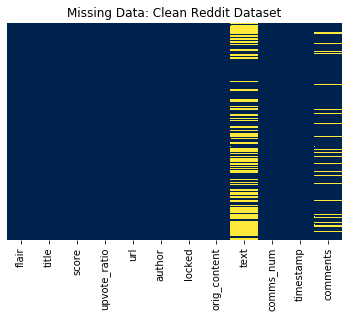

In [8]:
# Let's check which columns are missing data
sns.heatmap(eda_df.isnull(),yticklabels = False, cbar = False,cmap = 'cividis')

plt.title('Missing Data: Clean Reddit Dataset')
plt.show()

As we see the features 'text' and 'comments' have a lot of missing values(NaN). The text column has maximum missing values. it only has 1263 entries

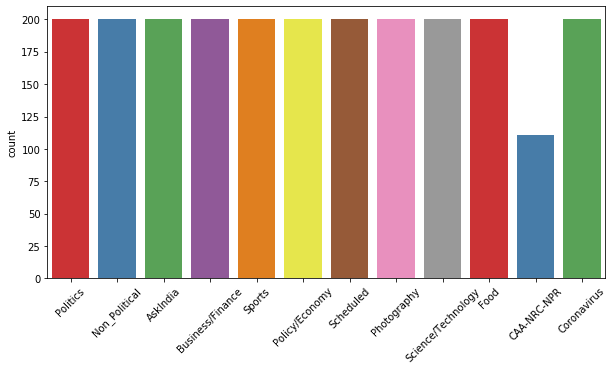

In [9]:
# Explore the target variable flair
plt.figure(figsize=(10,5))
flair_list = eda_df.flair.tolist()
chart = sns.countplot(flair_list,palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);


As we see, one category has a lower count, in particular 'CAA-NRC-NPR'. All other categories have 200 posts but this only has 111 posts

In [10]:
# Studying distribution of true and false in boolean columns
print(eda_df.locked.value_counts())
print(eda_df.orig_content.value_counts())

False    2309
True        2
Name: locked, dtype: int64
False    2293
True       18
Name: orig_content, dtype: int64


We see that majority of values in both columns is False. 
The orig_content will have very less relevance in influencing the target variable as it only has 2 out of 2311 values as True

Hence, we will drop the orig_content variable while building our classifier

In [11]:
# Type casting
# Boolean mapping to int
#True - 1
#False - 0
eda_df.locked = eda_df.locked.astype(int)
eda_df.orig_content = eda_df.orig_content.astype(int)
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311 entries, 0 to 2310
Data columns (total 12 columns):
flair           2311 non-null object
title           2311 non-null object
score           2311 non-null int64
upvote_ratio    2311 non-null float64
url             2311 non-null object
author          2311 non-null object
locked          2311 non-null int64
orig_content    2311 non-null int64
text            1263 non-null object
comms_num       2311 non-null int64
timestamp       2311 non-null object
comments        2069 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 216.8+ KB


In [12]:
# Filtering the numerical variables
num = eda_df.select_dtypes(include=['int64','float64'])
numerical_variables = num.columns.tolist()
print("Numerical variables = ",numerical_variables)

Numerical variables =  ['score', 'upvote_ratio', 'locked', 'orig_content', 'comms_num']


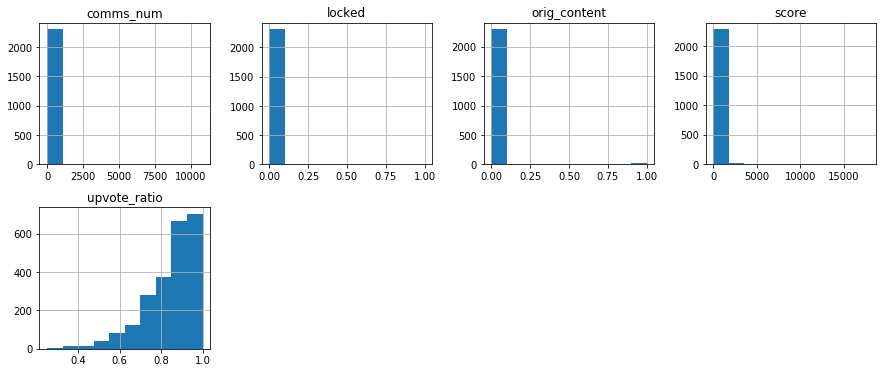

In [13]:
# Exploring the distribution of the numerical variables
eda_df[numerical_variables].hist(bins=10, figsize=(15, 6), layout=(2, 4));

Visualizing the relationship between the numerical variables and the target variable 'flair'

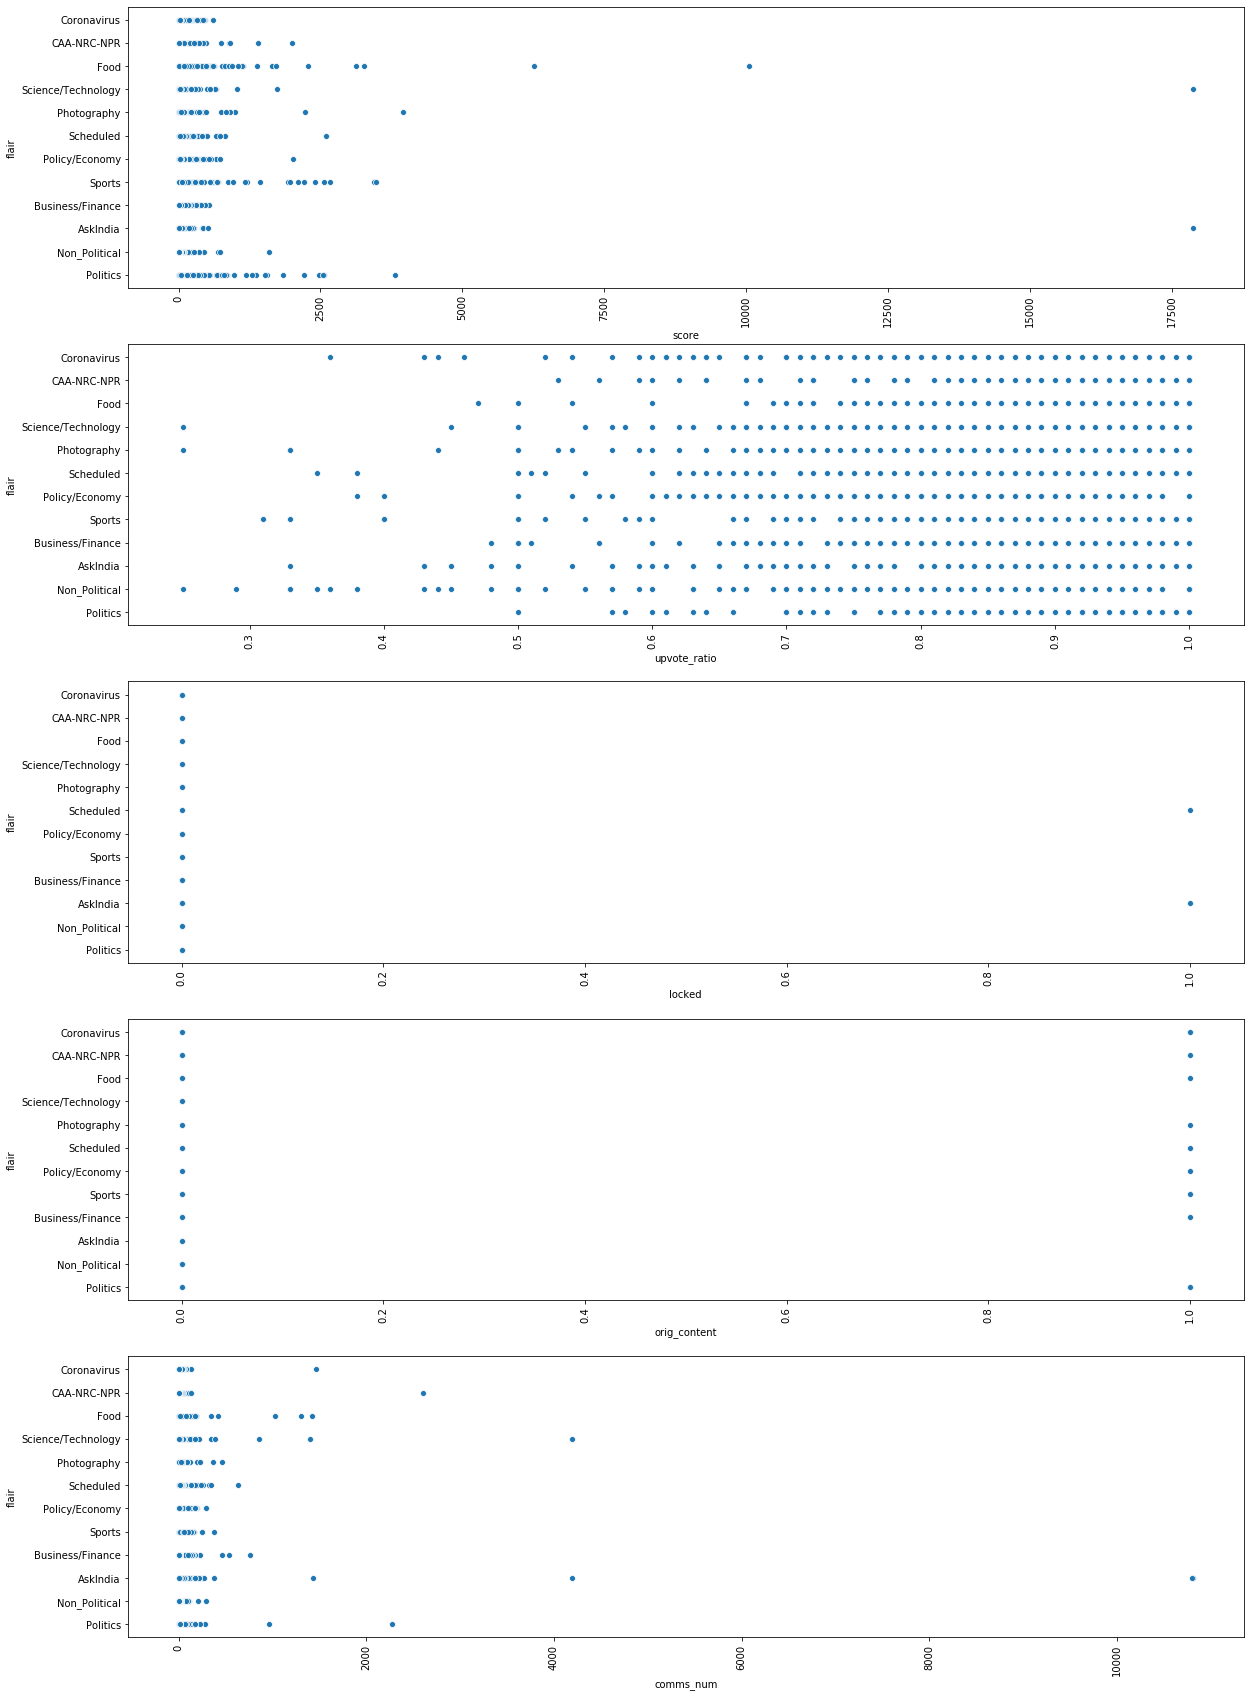

In [14]:
fig, ax = plt.subplots(5, 1, figsize=(20, 30))
for variable, subplot in zip(numerical_variables, ax.flatten()):
    sns.scatterplot(x=eda_df[variable],y=eda_df['flair'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [15]:
# Filtering the categorical variables
cat = eda_df.select_dtypes(include=['object'])
categorical_variables = cat.columns.tolist()
# Removing timestamp as it is not categorical variable
categorical_variables.pop(5)
# Removing the target variable flair
categorical_variables.pop(0)
# Categorical variables
print(categorical_variables)

['title', 'url', 'author', 'text', 'comments']


It doesn't makes sense to view the countplot/distributions of any categorical variables except author because they're all unique string variables. there are far too many unique strings for each

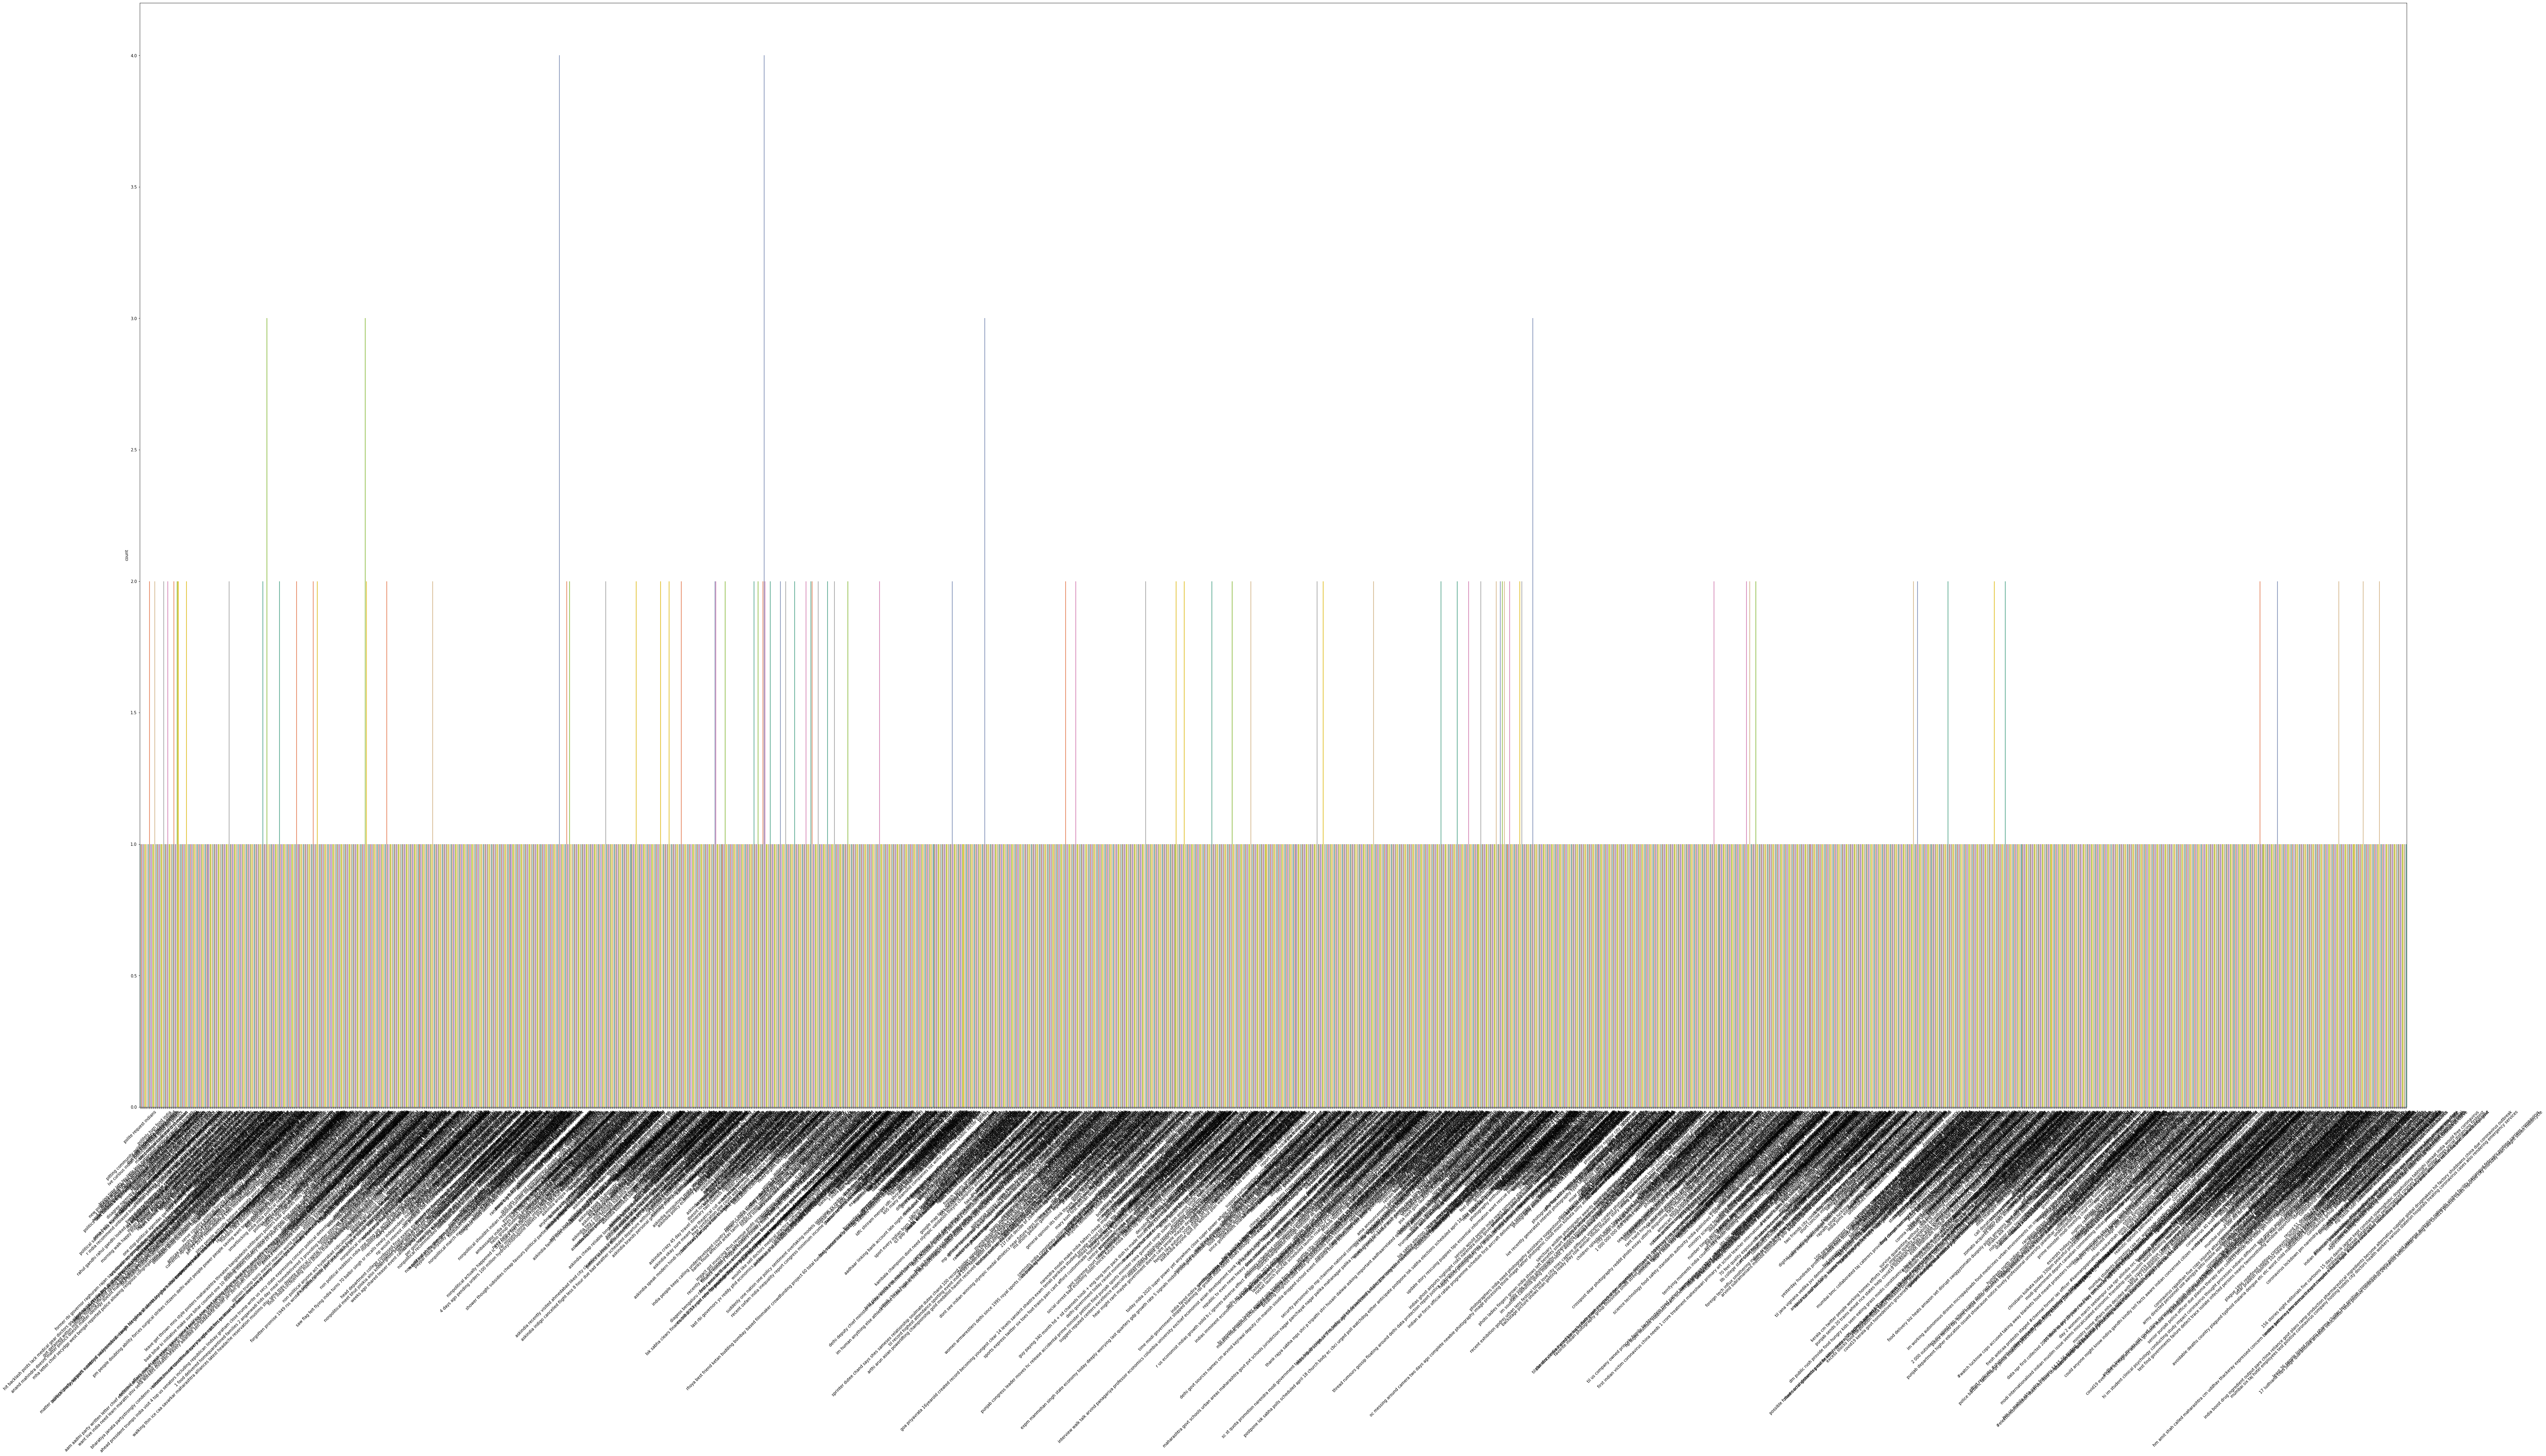

In [16]:
# Distribution of a categorical variable 'author' is an example to illustrate
plt.figure(figsize=(100,50))
title_list = eda_df.title.tolist()
chart = sns.countplot(title_list,palette='Set2')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

We can see that there are very few instances where the author name is repeated. Hence, we can ignore that while building our model. URL is also unique for most posts hence we can ignore that as well.

In [17]:
# Time series analysis
eda_df['timestamp'] =  pd.to_datetime(eda_df['timestamp'])
eda_df.set_index('timestamp', inplace=True)
eda_df.head(3)

flair  \
timestamp                       
2020-04-16 16:27:46  Politics   
2020-04-04 18:28:28  Politics   
2020-03-08 12:06:11  Politics   

                                                                 title  score  \
timestamp                                                                       
2020-04-16 16:27:46                             polite request indians    396   
2020-04-04 18:28:28   pitting community political party fucking stupid    196   
2020-03-08 12:06:11  new political party gave full front page ad po...    730   

                     upvote_ratio  \
timestamp                           
2020-04-16 16:27:46          0.96   
2020-04-04 18:28:28          0.80   
2020-03-08 12:06:11          0.97   

                                                                   url  \
timestamp                                                                
2020-04-16 16:27:46  https://www.reddit.com/r/india/comments/g2ct57...   
2020-04-04 18:28:28  https://www.reddit.com/r/india/comments/futac9...   
2020-03-08 12:06:11                https://i.redd.it/yjo9wpy38el41.jpg   

                                author  locked  orig_content  \
timestamp                                                      
2020-04-16 16:27:46      aaluinsonaout       0             0   
2020-04-04 18:28:28  chillinvillain122       0             0   
2020-03-08 12:06:11      aaluinsonaout       0             0   

                                                                  text  \
timestamp                                                                
2020-04-16 16:27:46  dont know situation countries india seen lot o...   
2020-04-04 18:28:28  first let start saying stupid whatever muslims...   
2020-03-08 12:06:11                                                NaN   

                     comms_num  \
timestamp                        
2020-04-16 16:27:46         82   
2020-04-04 18:28:28         73   
2020-03-08 12:06:11        146   

                                                              comments  
timestamp                                                               
2020-04-16 16:27:46  society thrives abuse power let many idiots ab...  
2020-04-04 18:28:28  country far moment theres turning back best ho...  
2020-03-08 12:06:11  looks like iipm ad 1 get funds full page ads 2...

We can see the time wise- trends for each flair

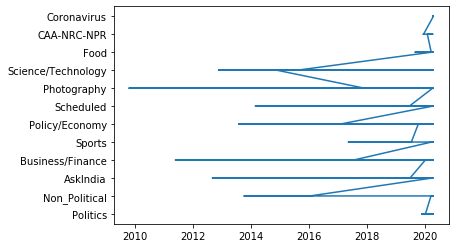

In [18]:
# Visualizing flair trends over the years
plt.plot(eda_df.index.to_pydatetime(), eda_df.flair)

While builing our model we will consider the following features:
- number of comments : numeric
- upvote ratio : numeric
- score : numeric
- locked : boolean
- title/text/comments can be text variables using text vectorization
- we drop orig_content because it has False value for 2309 out of 2311 values and is irrelavant
- we drop author/url because they're categorical variables unique for most entries.